In [1]:
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  
import numpy as np  

In [2]:
data = pd.read_csv('D:\\Spandana\\Excellenc\\student-mat.csv')  # Replace 'data.csv' with your dataset's filename

In [3]:
data.head()  

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
missing_values = data.isnull().sum()  
print("Missing Values:\n", missing_values)  


Missing Values:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [5]:
data.ffill(inplace=True)


In [6]:
print(data.dtypes)  

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [7]:
categorical_columns = ['school', 'sex', 'address', 'famsize']  # Update with actual categorical columns  
for column in categorical_columns:  
    data[column] = data[column].astype('category')  

# Exploratory Data Analysis (EDA) 

# 1. Distribution of final grades (G3) 

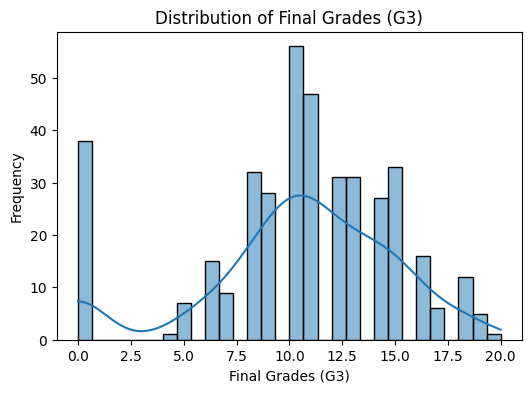

In [8]:
plt.figure(figsize=(6, 4))  
sns.histplot(data['G3'], bins=30, kde=True)  
plt.title('Distribution of Final Grades (G3)')  
plt.xlabel('Final Grades (G3)')  
plt.ylabel('Frequency')  
plt.show()  


# 2. Alcohol Consumption and Final Grades  

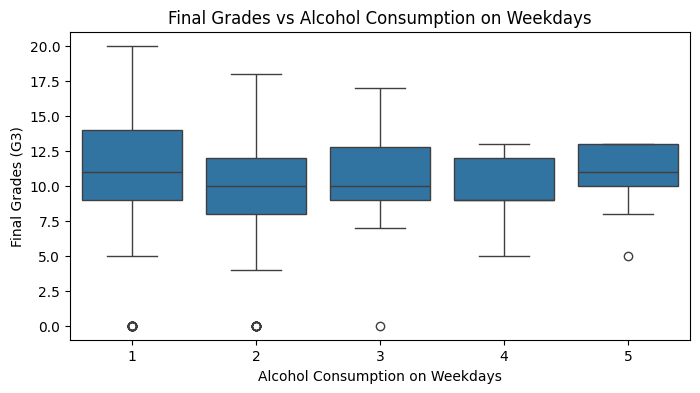

In [9]:
plt.figure(figsize=(8, 4))  
sns.boxplot(x='Dalc', y='G3', data=data)  # Update with actual column name  
plt.title('Final Grades vs Alcohol Consumption on Weekdays')  
plt.xlabel('Alcohol Consumption on Weekdays')  
plt.ylabel('Final Grades (G3)')  
plt.show()  

# 3. Heatmap for correlations  

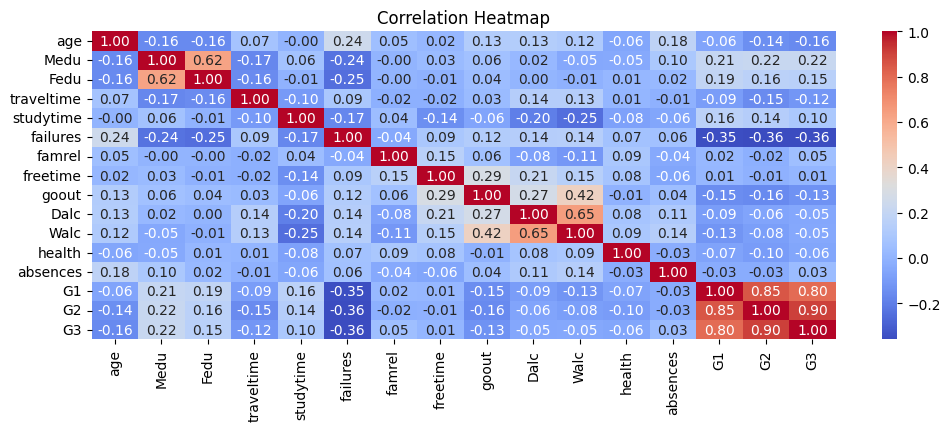

In [10]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


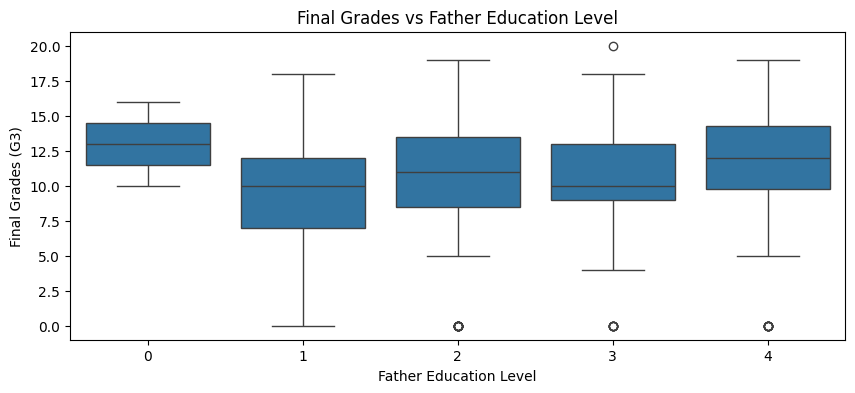

In [46]:
plt.figure(figsize=(10, 4))  
sns.boxplot(x='Fedu', y='G3', data=data)  # Update with actual column name  
plt.title('Final Grades vs Father Education Level')  
plt.xlabel('Father Education Level')  
plt.ylabel('Final Grades (G3)')  
plt.show()  


# 5. Alcohol Consumption on Weekends  

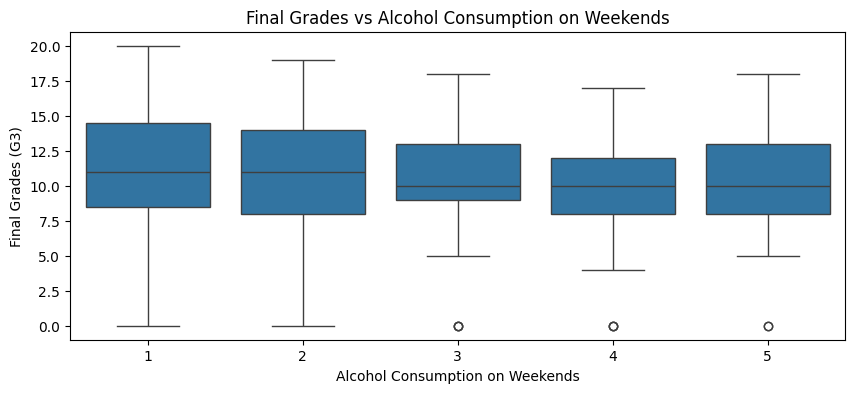

In [48]:
plt.figure(figsize=(10, 4))  
sns.boxplot(x='Walc', y='G3', data=data)  # Update with actual column name  
plt.title('Final Grades vs Alcohol Consumption on Weekends')  
plt.xlabel('Alcohol Consumption on Weekends')  
plt.ylabel('Final Grades (G3)')  
plt.show()  

# Statistical Analysis  
# Checking correlation between alcohol consumption and grades 

In [50]:
alcohol_weekday_corr = data['Dalc'].corr(data['G3'])  # Adjust variable names accordingly  
alcohol_weekend_corr = data['Walc'].corr(data['G3'])  # Adjust variable names accordingly  

print(f'Correlation between weekday alcohol consumption and final grades: {alcohol_weekday_corr}')  
print(f'Correlation between weekend alcohol consumption and final grades: {alcohol_weekend_corr}')  

Correlation between weekday alcohol consumption and final grades: -0.05466004056673598
Correlation between weekend alcohol consumption and final grades: -0.05193932374224616


# Analysis of Parental Education (Medu and Fedu) on Final Grades (G3)  

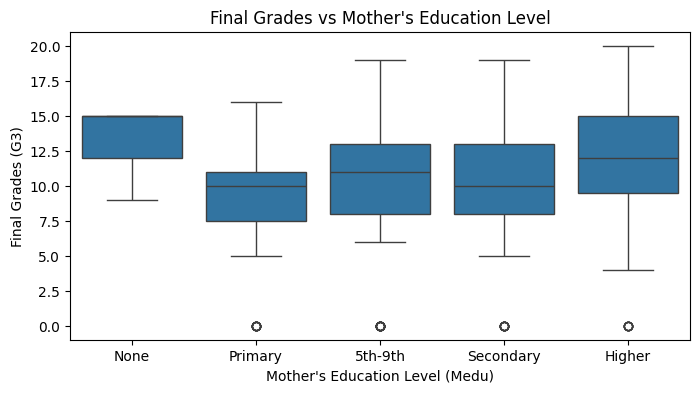

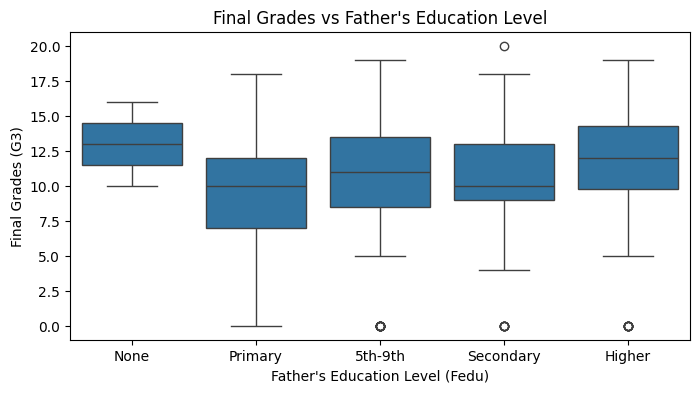

In [54]:
plt.figure(figsize=(8, 4))  
sns.boxplot(x='Medu', y='G3', data=data)  
plt.title("Final Grades vs Mother's Education Level")  
plt.xlabel("Mother's Education Level (Medu)")  
plt.ylabel("Final Grades (G3)")  
plt.xticks(ticks=np.arange(5), labels=['None', 'Primary', '5th-9th', 'Secondary', 'Higher'])  
plt.show()  

plt.figure(figsize=(8, 4))  
sns.boxplot(x='Fedu', y='G3', data=data)  
plt.title("Final Grades vs Father's Education Level")  
plt.xlabel("Father's Education Level (Fedu)")  
plt.ylabel("Final Grades (G3)")  
plt.xticks(ticks=np.arange(5), labels=['None', 'Primary', '5th-9th', 'Secondary', 'Higher'])  
plt.show()  


# Analysis of Family Size and Structure (famsize and Pstatus) on Final Grades (G3)

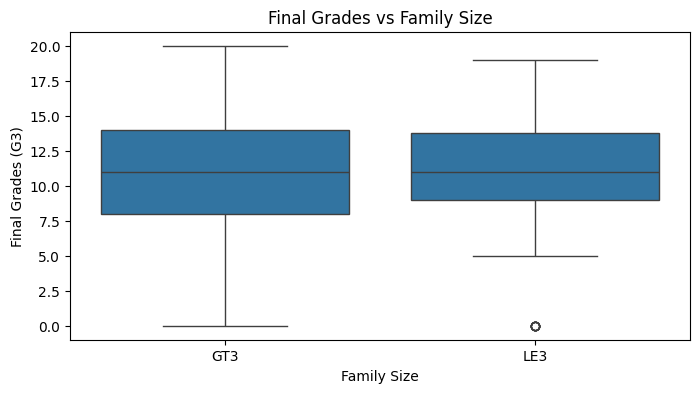

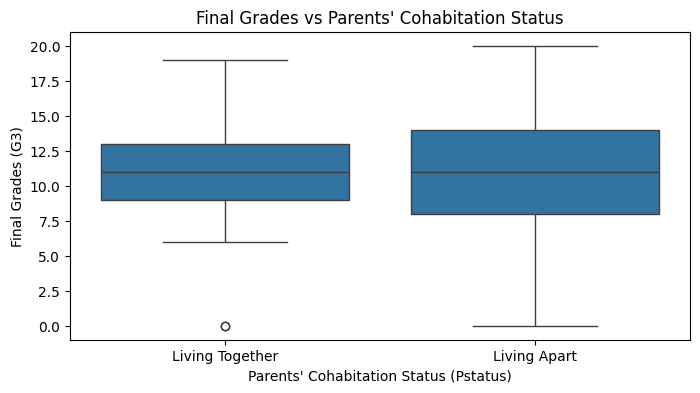

In [57]:
plt.figure(figsize=(8, 4))  
sns.boxplot(x='famsize', y='G3', data=data)  
plt.title("Final Grades vs Family Size")  
plt.xlabel("Family Size")  
plt.ylabel("Final Grades (G3)")  
plt.show()  

plt.figure(figsize=(8, 4))  
sns.boxplot(x='Pstatus', y='G3', data=data)  
plt.title("Final Grades vs Parents' Cohabitation Status")  
plt.xlabel("Parents' Cohabitation Status (Pstatus)")  
plt.ylabel("Final Grades (G3)")  
plt.xticks(ticks=[0, 1], labels=['Living Together', 'Living Apart'])  
plt.show()  

# Correlation analysis to provide numerical insight 

In [64]:
# Copying the necessary columns for correlation
correlation_matrix = data[['G3', 'Medu', 'Fedu', 'famsize', 'Pstatus']].copy()

# Convert 'Pstatus' and 'famsize' to 'category' dtype
correlation_matrix['Pstatus'] = correlation_matrix['Pstatus'].astype('category')
correlation_matrix['famsize'] = correlation_matrix['famsize'].astype('category')

# Convert the categorical columns to numerical codes
correlation_matrix['Pstatus'] = correlation_matrix['Pstatus'].cat.codes
correlation_matrix['famsize'] = correlation_matrix['famsize'].cat.codes

# Calculate the correlation matrix
correlation = correlation_matrix.corr()

# Print the correlation matrix for numerical insight
print("\nCorrelation Matrix:\n", correlation)



Correlation Matrix:
                G3      Medu      Fedu   famsize   Pstatus
G3       1.000000  0.217147  0.152457  0.081407 -0.058009
Medu     0.217147  1.000000  0.623455 -0.043068 -0.123565
Fedu     0.152457  0.623455  1.000000 -0.058879 -0.088730
famsize  0.081407 -0.043068 -0.058879  1.000000 -0.149612
Pstatus -0.058009 -0.123565 -0.088730 -0.149612  1.000000


# Heatmap for the correlation matrix  

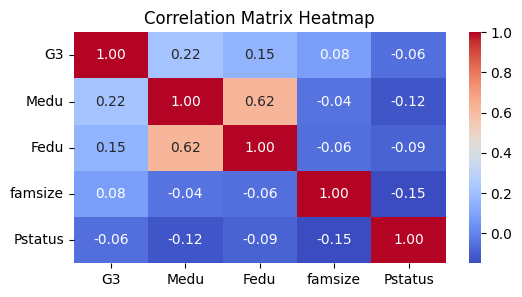

In [67]:
plt.figure(figsize=(6, 3))  
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')  
plt.title('Correlation Matrix Heatmap')  
plt.show()

# Analyzing Weekday vs. Weekend Alcohol Consumption  

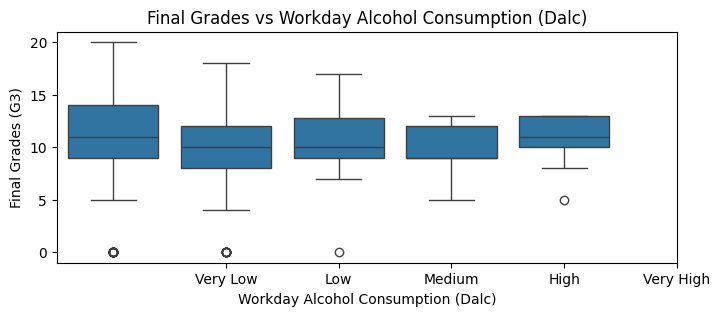

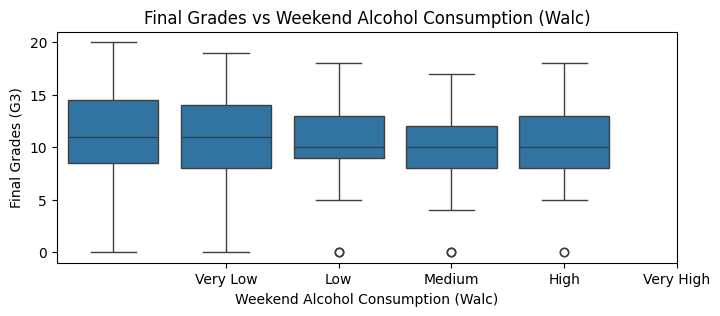

In [70]:
plt.figure(figsize=(8, 3))  
sns.boxplot(x='Dalc', y='G3', data=data)  
plt.title("Final Grades vs Workday Alcohol Consumption (Dalc)")  
plt.xlabel("Workday Alcohol Consumption (Dalc)")  
plt.ylabel("Final Grades (G3)")  
plt.xticks(ticks=range(1, 6), labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])  
plt.show()  

plt.figure(figsize=(8, 3))  
sns.boxplot(x='Walc', y='G3', data=data)  
plt.title("Final Grades vs Weekend Alcohol Consumption (Walc)")  
plt.xlabel("Weekend Alcohol Consumption (Walc)")  
plt.ylabel("Final Grades (G3)")  
plt.xticks(ticks=range(1, 6), labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])  
plt.show()  

# Calculate correlation between alcohol consumption and final grades

In [75]:
# Import the pearsonr function from scipy.stats
from scipy.stats import pearsonr

# Calculate the Pearson correlation between Dalc (workday alcohol consumption) and G3 (final grades)
correlation_dalc, _ = pearsonr(data['Dalc'], data['G3'])
correlation_walc, _ = pearsonr(data['Walc'], data['G3'])

# Print the results
print(f"Correlation between Workday Alcohol Consumption (Dalc) and Final Grades (G3): {correlation_dalc:.2f}")
print(f"Correlation between Weekend Alcohol Consumption (Walc) and Final Grades (G3): {correlation_walc:.2f}")


Correlation between Workday Alcohol Consumption (Dalc) and Final Grades (G3): -0.05
Correlation between Weekend Alcohol Consumption (Walc) and Final Grades (G3): -0.05


# Visualizing the correlation with a heatmap

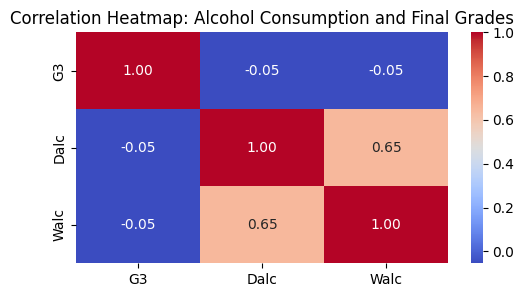

In [78]:
correlation_matrix = data[['G3', 'Dalc', 'Walc']].corr()  
plt.figure(figsize=(6, 3))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')  
plt.title('Correlation Heatmap: Alcohol Consumption and Final Grades')  
plt.show()

# Analyzing Study Time  

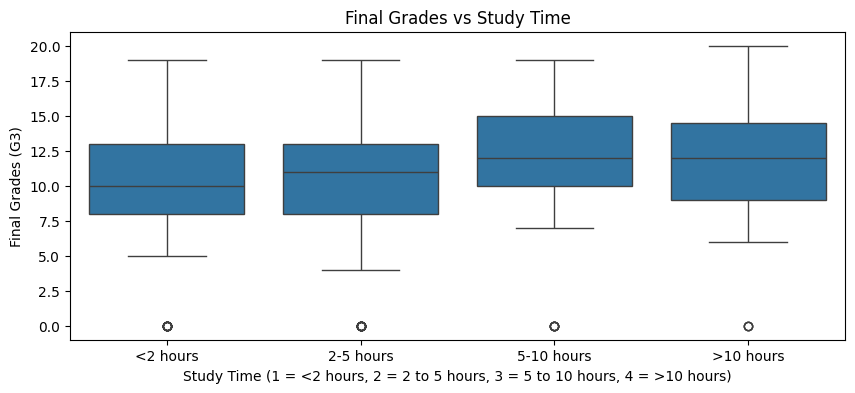

In [82]:
plt.figure(figsize=(10, 4))  
sns.boxplot(x='studytime', y='G3', data=data)  
plt.title("Final Grades vs Study Time")  
plt.xlabel("Study Time (1 = <2 hours, 2 = 2 to 5 hours, 3 = 5 to 10 hours, 4 = >10 hours)")  
plt.ylabel("Final Grades (G3)")  
plt.xticks(ticks=range(4), labels=['<2 hours', '2-5 hours', '5-10 hours', '>10 hours'])  
plt.show()

# Analyzing Past Failures

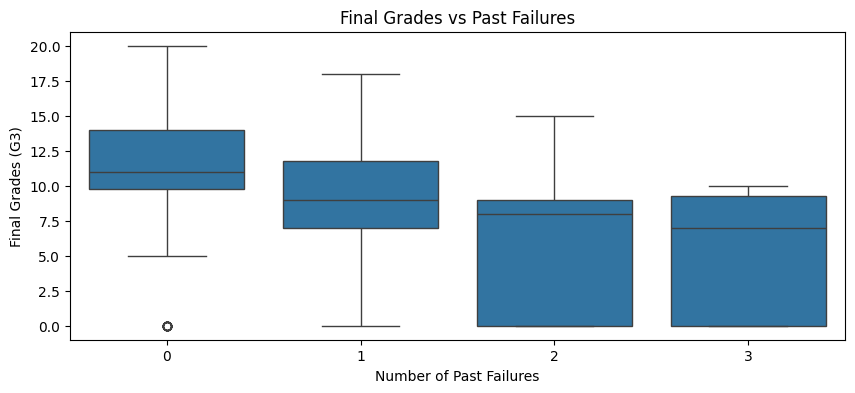

In [88]:
plt.figure(figsize=(10, 4))  
sns.boxplot(x='failures', y='G3', data=data)  
plt.title("Final Grades vs Past Failures")  
plt.xlabel("Number of Past Failures")  
plt.ylabel("Final Grades (G3)")  
plt.xticks(ticks=range(data['failures'].max() + 1), labels=range(data['failures'].max() + 1))  
plt.show()  

# Calculate correlation between study time, past failures, and final grades  

In [90]:
correlation_studytime, _ = pearsonr(data['studytime'], data['G3'])  
correlation_failures, _ = pearsonr(data['failures'], data['G3'])  

print(f"Correlation between Study Time and Final Grades (G3): {correlation_studytime:.2f}")  
print(f"Correlation between Past Failures and Final Grades (G3): {correlation_failures:.2f}")  

Correlation between Study Time and Final Grades (G3): 0.10
Correlation between Past Failures and Final Grades (G3): -0.36


# Visualizing the correlation with a heatmap 
# Calculate correlation between study time, past failures, and final grades  

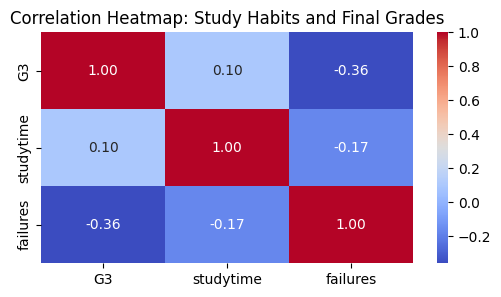

In [92]:
correlation_matrix = data[['G3', 'studytime', 'failures']].corr()  
plt.figure(figsize=(6, 3))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')  
plt.title('Correlation Heatmap: Study Habits and Final Grades')  
plt.show()

# Analyzing Extra Educational Support 

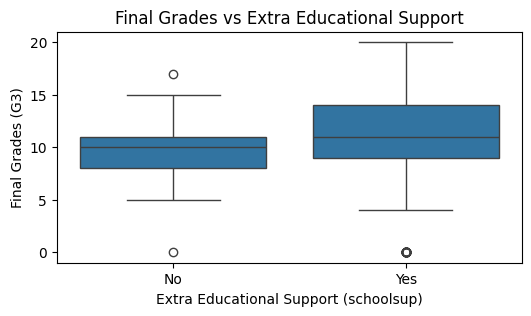

In [95]:
plt.figure(figsize=(6, 3))  
sns.boxplot(x='schoolsup', y='G3', data=data)  
plt.title("Final Grades vs Extra Educational Support")  
plt.xlabel("Extra Educational Support (schoolsup)")  
plt.ylabel("Final Grades (G3)")  
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  
plt.show() 

# Analyzing Family Educational Support

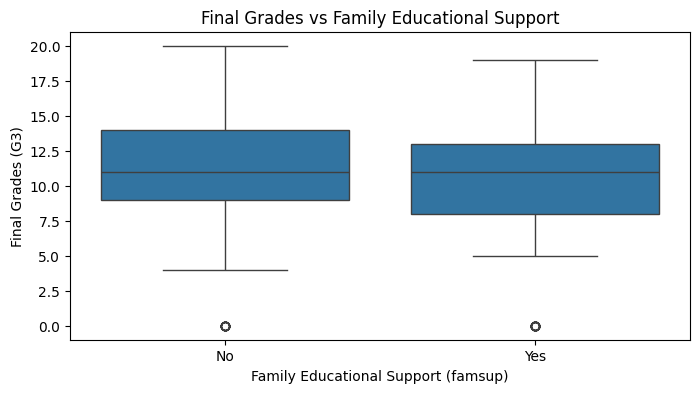

In [98]:
plt.figure(figsize=(8, 4))  
sns.boxplot(x='famsup', y='G3', data=data)  
plt.title("Final Grades vs Family Educational Support")  
plt.xlabel("Family Educational Support (famsup)")  
plt.ylabel("Final Grades (G3)")  
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  
plt.show()  

# Analyzing Participation in Extracurricular Activities 

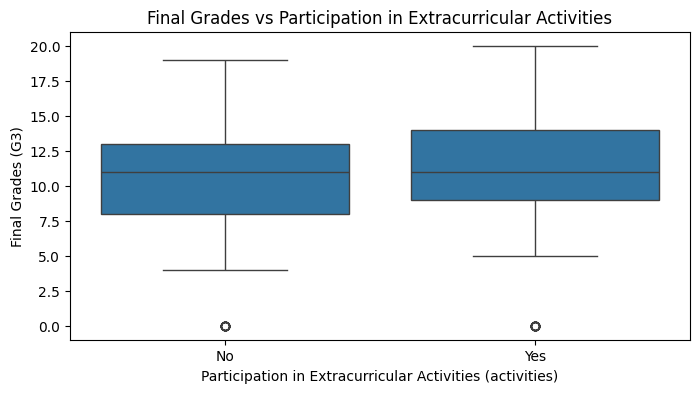

In [100]:
plt.figure(figsize=(8, 4))  
sns.boxplot(x='activities', y='G3', data=data)  
plt.title("Final Grades vs Participation in Extracurricular Activities")  
plt.xlabel("Participation in Extracurricular Activities (activities)")  
plt.ylabel("Final Grades (G3)")  
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  
plt.show() 

# Calculate correlation between support and extracurricular activities with final grades 

In [101]:
correlation_schoolsup, _ = pearsonr(data['schoolsup'].map({'yes': 1, 'no': 0}), data['G3'])  
correlation_famsup, _ = pearsonr(data['famsup'].map({'yes': 1, 'no': 0}), data['G3'])  
correlation_activities, _ = pearsonr(data['activities'].map({'yes': 1, 'no': 0}), data['G3'])  

print(f"Correlation between Extra Educational Support and Final Grades (G3): {correlation_schoolsup:.2f}")  
print(f"Correlation between Family Educational Support and Final Grades (G3): {correlation_famsup:.2f}")  
print(f"Correlation between Participation in Extracurricular Activities and Final Grades (G3): {correlation_activities:.2f}") 

Correlation between Extra Educational Support and Final Grades (G3): -0.08
Correlation between Family Educational Support and Final Grades (G3): -0.04
Correlation between Participation in Extracurricular Activities and Final Grades (G3): 0.02


# Visualizing the correlation with a heatmap  
# Calculate correlation between support and extracurricular activities with final grades 

C:\Users\SPANDANA PRIYA\AppData\Local\Temp\ipykernel_33592\2748583016.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  correlation_matrix = data[['G3', 'schoolsup', 'famsup', 'activities']].replace({'yes': 1, 'no': 0})


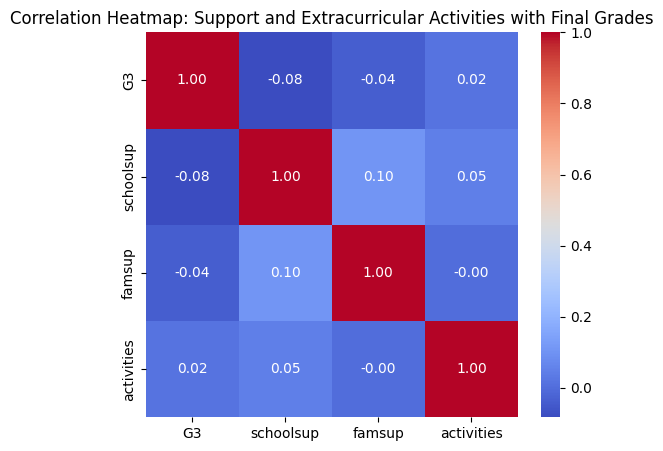

In [104]:
correlation_matrix = data[['G3', 'schoolsup', 'famsup', 'activities']].replace({'yes': 1, 'no': 0})
correlation_matrix = correlation_matrix.astype(int)  # Ensure the data types are int for correlation calculation

# Calculate the correlation matrix
correlation_matrix = correlation_matrix.corr()

plt.figure(figsize=(6, 5))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')  
plt.title('Correlation Heatmap: Support and Extracurricular Activities with Final Grades')  
plt.show()
